# 6.1 로지스틱 회귀

In [1]:
import pandas as pd

In [2]:
g=pd.read_csv('ch6-1.csv')

In [3]:
g.head()

,wing_length,tail_length,gender
0,44,9,m
1,42,9,m
2,43,8,m
3,40,10,m
4,44,8,m


In [4]:
g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   wing_length  60 non-null     int64 
 1   tail_length  60 non-null     int64 
 2   gender       60 non-null     object
dtypes: int64(2), object(1)
memory usage: 1.5+ KB


In [5]:
g['gender']=g['gender'].map({'m':1,'f':0})
g.head()

,wing_length,tail_length,gender
0,44,9,1
1,42,9,1
2,43,8,1
3,40,10,1
4,44,8,1


### 1.3 로지스틱 회귀분석

In [6]:
#로지스틱 회귀 구현을 위한 모듈 불러오기
import statsmodels.api as sm

In [7]:
#모델 구축 및 학습
model_glm = sm.Logit.from_formula('gender ~ wing_length + tail_length', data=g).fit()

Optimization terminated successfully.
         Current function value: 0.137215
         Iterations 9


### 1.4 분류 알고리즘의 성능 평가 방법
#### 1. 정오분류표 : 예측값과 실제 값이 일치하는 개수의 합을 전체 개수로 나눈 값인 정확도가 중요한 지표
####                          민감도(재현율)와 특이도도 중요함
#### 2. ROC커브 : 정오분류표를 통해 도출해 낸 민감도를 y축, 1-특이도를 x축으로 하는 커브
####                        커브의 밑부분 면적을 AUC라고 하며 AUC가 100%에 가까울수록 분류 모델의 성능이 뛰어남

### 1.5 로지스틱 회귀모델의 성능 평가

In [8]:
#predict() 메소드를 이용해 예측값(확률)생성
y_prob=model_glm.predict(g.iloc[:,0:2])

In [9]:
y_prob.head()
#결과 해석
#0번 값은 수컷일 확률이 91.5%

0    0.915579
1    0.988904
2    0.997049
3    0.985377
4    0.991588
dtype: float64

In [10]:
# 예측값(확률)을 반올림을 통해 1과 0으로 표현한 뒤 list 타입으로 변경
y_pred=list(map(round, y_prob))

In [11]:
#예측값 확인
y_pred[0:5]

[1, 1, 1, 1, 1]

In [12]:
#기준값인 gender열을 별도 y로 저장
y=g['gender']

In [13]:
#정오분류표 함수 불러오기
from sklearn.metrics import confusion_matrix

In [14]:
#분류 결과 평가, 1을 기준으로
confusion_matrix(y,y_pred, labels=[1,0])

array([[28,  2],
       [ 1, 29]], dtype=int64)

In [15]:
#분류 리포트 함수 불러오기
from sklearn.metrics import classification_report

In [16]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.97      0.93      0.95        30

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



In [17]:
#ROC커브를 그리기 위한 함수 불러오기
from sklearn.metrics import roc_curve
#ROC 커브를 그리기 위한 변수 설정
fpr, tpr, thresholds = roc_curve(y,y_prob)

In [18]:
#ROC커브 그리기
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

<Figure size 1000x700 with 1 Axes>

In [19]:
#AUC 계산을 위한 함수 불러오기
from sklearn.metrics import auc

In [20]:
#AUC 계산
auc(fpr,tpr)
#1에 가까운 높은 값임. 따라서 암수 구분 로지스틱 회귀모델의 성능이 매우 뛰어남

0.9866666666666667

# 6.2 분류 알고리즘

### 6.2.2 나이브 베이즈 분류 (Naive Bayes Classification)

#### 쉽게 말해 조건부 확률을 구하는 것과 같음
#### 조건부 확률은 사건 B가 일어났다는 조건 하에 사건 A가 일어날 확률을 P(A|B)로 표현하며 사후확률이라고도 함

In [21]:
#실습용 데이터 불러오기
import pandas as pd
df_train=pd.read_csv('ch6-2_train.csv')
df_test=pd.read_csv('ch6-2_test.csv')

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   wing_length  240 non-null    int64 
 1   tail_length  240 non-null    int64 
 2   comb_height  240 non-null    int64 
 3   breeds       240 non-null    object
dtypes: int64(3), object(1)
memory usage: 7.6+ KB


In [23]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   wing_length  60 non-null     int64 
 1   tail_length  60 non-null     int64 
 2   comb_height  60 non-null     int64 
 3   breeds       60 non-null     object
dtypes: int64(3), object(1)
memory usage: 2.0+ KB


In [24]:
df_train.head()

,wing_length,tail_length,comb_height,breeds
0,238,63,34,a
1,236,67,30,a
2,256,65,34,a
3,240,63,35,a
4,246,65,30,a


In [25]:
#train, test 데이터 셋 각각 x,y로 분할, ndarray타입
x_train=df_train.iloc[:,0:3].values
y_train=df_train.iloc[:,3].values
x_test=df_test.iloc[:,0:3].values
y_test=df_test.iloc[:,3].values

In [26]:
#나이브 베이즈 알고리즘 수행을 위한 함수 불러오기
from sklearn.naive_bayes import GaussianNB

In [27]:
#모델 구축 및 학습
model_nb=GaussianNB().fit(x_train, y_train)

In [28]:
#예측값 생성
y_pred_nb=model_nb.predict(x_test)

In [29]:
y_pred_nb

array(['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b',
       'b', 'b', 'c', 'b', 'b', 'b', 'b', 'c', 'b', 'b', 'b', 'b', 'b',
       'a', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'b',
       'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c'], dtype='<U1')

In [30]:
#예측 결과 평가
from sklearn.metrics import confusion_matrix

In [31]:
#위쪽이 예측값, 좌측이 실제값
confusion_matrix(y_test, y_pred_nb)

array([[20,  0,  0],
       [ 1, 17,  2],
       [ 0,  1, 19]], dtype=int64)

In [32]:
#예측 결과 평가
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.94      0.85      0.89        20
           c       0.90      0.95      0.93        20

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



### 6.2.3 k-최근접 이웃

In [33]:
#k-NN 알고리즘 수행을 위한 함수 불러오기
from sklearn.neighbors import KNeighborsClassifier

In [34]:
#모델 구축 및 학습 (k=3)
model_knn = KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)

In [35]:
y_pred_knn=model_knn.predict(x_test)

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_knn)

array([[19,  1,  0],
       [ 1, 16,  3],
       [ 0,  1, 19]], dtype=int64)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           a       0.95      0.95      0.95        20
           b       0.89      0.80      0.84        20
           c       0.86      0.95      0.90        20

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



In [38]:
#모델 구축 학습 k=5
model_knn5 = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)

In [39]:
y_pred_knn5=model_knn5.predict(x_test)

In [40]:
confusion_matrix(y_test, y_pred_knn5)

array([[20,  0,  0],
       [ 1, 17,  2],
       [ 0,  2, 18]], dtype=int64)

In [41]:
print(classification_report(y_test, y_pred_knn5))

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.89      0.85      0.87        20
           c       0.90      0.90      0.90        20

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



### 6.2.4 의사결정나무

In [42]:
#의사결정나무 알고리즘 수행 및 시각화를 위한 함수 불러오기
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [43]:
#모델 구축 및 학습
model_tree = DecisionTreeClassifier().fit(x_train, y_train)

In [44]:
y_pred_tree=model_tree.predict(x_test)

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.82      0.90      0.86        20
           c       0.94      0.80      0.86        20

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



In [46]:
#모델 구축(분할 기준:entropy) 및 학습
model_tree2=DecisionTreeClassifier(criterion='entropy').fit(x_train, y_train)

In [47]:
y_pred_tree2=model_tree2.predict(x_test)

In [48]:
confusion_matrix(y_test, y_pred_tree2)

array([[20,  0,  0],
       [ 1, 18,  1],
       [ 0,  2, 18]], dtype=int64)

In [49]:
print(classification_report(y_test, y_pred_tree2))
#결과 해석: 정확도가 0.93, 정밀도의 최소값 0.9까지 상승.
# 지니 지수보다는 엔트로피 지수가 더 적합

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.90      0.90      0.90        20
           c       0.95      0.90      0.92        20

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



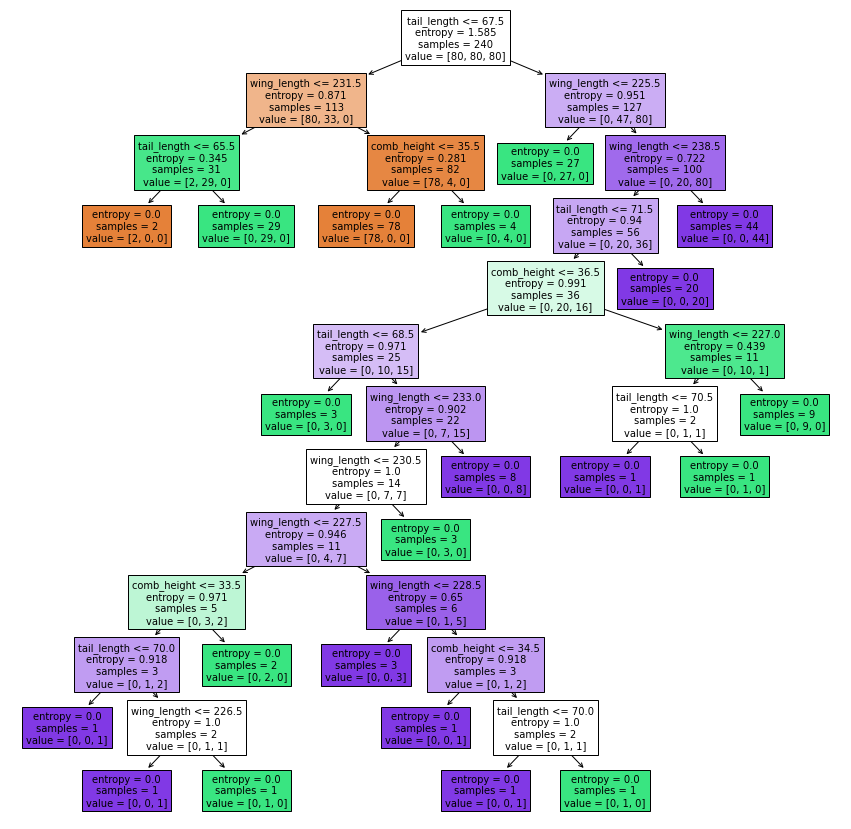

In [50]:
#트리그리기
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plot_tree(model_tree2, feature_names=['wing_length','tail_length','comb_height'],filled=True)
plt.show()

In [51]:
#모델 구축 분할 기준(entropy, 최대 깊이:3) 및 학습
model_tree3=DecisionTreeClassifier(criterion='entropy', max_depth=3).fit(x_train, y_train)

In [52]:
y_pred_tree3=model_tree3.predict(x_test)

In [53]:
confusion_matrix(y_test, y_pred_tree3)

array([[20,  0,  0],
       [ 1, 14,  5],
       [ 0,  2, 18]], dtype=int64)

In [54]:
print(classification_report(y_test, y_pred_tree3))

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.88      0.70      0.78        20
           c       0.78      0.90      0.84        20

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.86        60
weighted avg       0.87      0.87      0.86        60



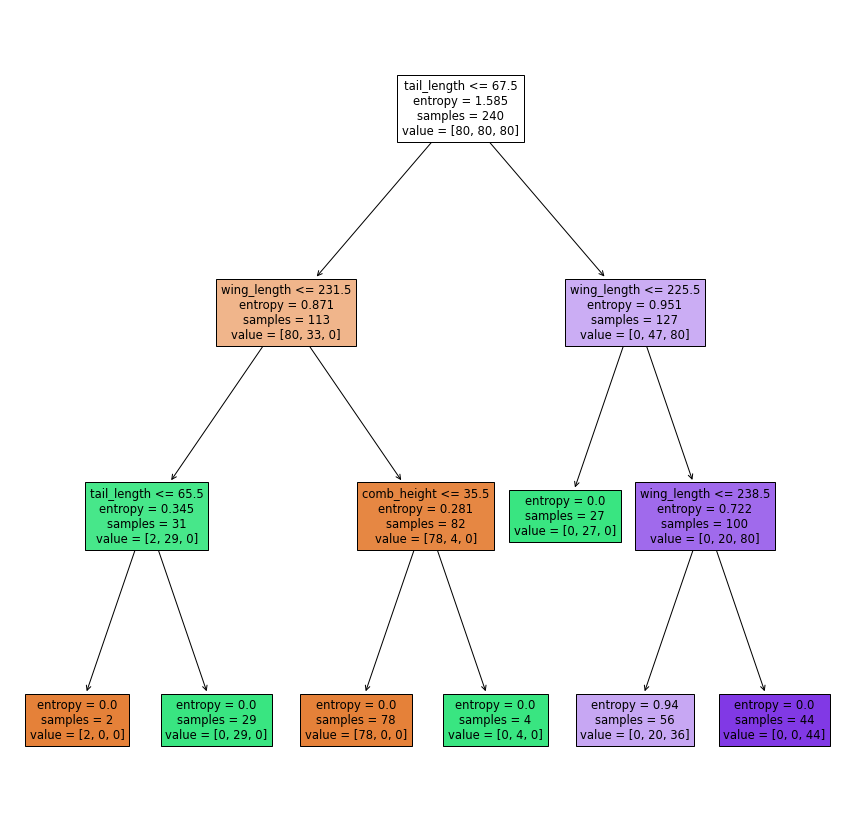

In [55]:
#트리 그리기
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plot_tree(model_tree3, feature_names=['wing_length','tail_length','comb_height'],filled=True)
plt.show()

### 6.2.5 배깅

In [56]:
#배깅 알고리즘 수행을 위한 함수 불러오기
from sklearn.ensemble import BaggingClassifier

In [57]:
#모델 구축 및 학습
model_bag=BaggingClassifier().fit(x_train, y_train)

In [58]:
y_pred_bag=model_bag.predict(x_test)

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_bag))

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.90      0.90      0.90        20
           c       0.95      0.90      0.92        20

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



### 6.2.6 부스팅

In [61]:
#에이다부스트 알고리즘 수행을 위한 함수 불러오기
from sklearn.ensemble import AdaBoostClassifier as abc

In [62]:
model_adb=abc().fit(x_train, y_train)

In [63]:
y_pred_adb=model_adb.predict(x_test)

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_adb)

array([[20,  0,  0],
       [ 1, 16,  3],
       [ 0,  1, 19]], dtype=int64)

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_adb))

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.94      0.80      0.86        20
           c       0.86      0.95      0.90        20

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



In [66]:
#그래디언트 부스팅 알고리즘 수행을 위한 함수 불러오기
from sklearn.ensemble import GradientBoostingClassifier as gbc

In [67]:
#모델 구축 및 학습
model_gb=gbc().fit(x_train, y_train)

In [68]:
y_pred_gb=model_gb.predict(x_test)

In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_gb)

array([[20,  0,  0],
       [ 1, 18,  1],
       [ 0,  2, 18]], dtype=int64)

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.90      0.90      0.90        20
           c       0.95      0.90      0.92        20

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



### 6.2.7 랜덤 포레스트

In [71]:
# 랜덤 포레스트 알고리즘 수행을 위한 함수 불러오기
from sklearn.ensemble import RandomForestClassifier as rfc

In [72]:
#모델 구축 및 학습
model_rf=rfc().fit(x_train, y_train)

In [73]:
y_pred_rf=model_rf.predict(x_test)

In [74]:
from sklearn.metrics import confusion_matrix as cm
cm(y_test, y_pred_rf)

array([[20,  0,  0],
       [ 1, 18,  1],
       [ 0,  1, 19]], dtype=int64)

In [75]:
from sklearn.metrics import classification_report as cr
print(cr(y_test, y_pred_rf))

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.95      0.90      0.92        20
           c       0.95      0.95      0.95        20

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



### 6.2.8 서포트 벡터 머신

In [76]:
#서포트 벡터 머신 알고리즘 수행을 위한 함수 불러오기
from sklearn.svm import SVC

In [77]:
#모델 구축 및 학습
model_svm=SVC(kernel='linear').fit(x_train,y_train)
y_pred_svm=model_svm.predict(x_test)

In [78]:
cm(y_test, y_pred_svm)

array([[20,  0,  0],
       [ 1, 17,  2],
       [ 0,  1, 19]], dtype=int64)

In [79]:
print(cr(y_test,y_pred_svm))

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.94      0.85      0.89        20
           c       0.90      0.95      0.93        20

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



In [80]:
#예측값을 데이터 프레임으로 만들고 열이름을 breecs_pred로 지정
df_y_pred_svm=pd.DataFrame(y_pred_svm, columns=['breeds_pred'])

In [81]:
#기존 test 데이터 셋에 svm 예측 결과 열 합치기
df_svm=pd.concat([df_test, df_y_pred_svm], axis=1)

In [82]:
df_svm.head()

,wing_length,tail_length,comb_height,breeds,breeds_pred
0,258,67,32,a,a
1,260,64,34,a,a
2,251,63,31,a,a
3,248,63,30,a,a
4,254,62,32,a,a


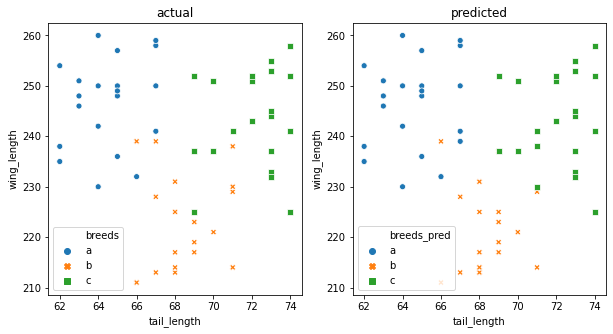

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df_svm, x='tail_length', y='wing_length', hue='breeds', style='breeds')
plt.title('actual')
plt.subplot(1,2,2)
sns.scatterplot(data=df_svm, x='tail_length', y='wing_length', hue='breeds_pred', style='breeds_pred')
plt.title('predicted')
plt.show()

### 6.2.9 XGBoost와 하이퍼 파라미터 튜닝

In [84]:
#xgboost 패키지 설치
!pip install xgboost==0.90

In [85]:
#XGBoost 알고리즘 수행을 위한 함수 불러오기
from xgboost import XGBClassifier

In [86]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [87]:
#모델 구축 및 학습
model_xgb=XGBClassifier().fit(x_train, y_train)

[18:47:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\project\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [90]:
y_pred_xgb=model_xgb.predict(x_test)

In [91]:
from sklearn.metrics import confusion_matrix

In [92]:
confusion_matrix(y_test,y_pred_xgb)

array([[20,  0,  0],
       [ 1, 18,  1],
       [ 0,  1, 19]], dtype=int64)

In [88]:
from sklearn.metrics import classification_report as cr

In [93]:
print(cr(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.95      0.90      0.92        20
           c       0.95      0.95      0.95        20

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



In [94]:
#그리드서치 함수 불러오기
from sklearn.model_selection import GridSearchCV as gscv

In [101]:
#그리드 서치로 실행할 하이퍼 파라미터 딕셔너리 타입으로 저장
xgb_param_grid={
    'eta':[0.05, 0.1, 0.3, 0.5],
    'gamma':[0, 0.5, 1, 2],
    'max__depth':[2, 4, 8, 12]
}

In [96]:
#평가 기준이 정확도인 그리드서치 모델 구축
xgb_grid=gscv(XGBClassifier(), param_grid=xgb_param_grid, n_jobs=-1, scoring='accuracy')

In [97]:
#그리드 서치 모델 학습
xgb_grid.fit(x_train, y_train)

[18:50:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "max__depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:50:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\project\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
            

In [98]:
#정확도 최고 점수
xgb_grid.best_score_

0.9541666666666666

In [99]:
#정확도가 최고일 때의 하이퍼 파라미터
xgb_grid.best_params_

{'eta': 0.1, 'gamma': 0, 'max__depth': 2}

In [103]:
#선정된 하이퍼 파라미터로 재학습
model_xgb2 = XGBClassifier(eta=0.5, gamma=0, max_depth=8).fit(x_train,y_train)

[18:53:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [104]:
y_pred_xgb2=model_xgb2.predict(x_test)

In [105]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_xgb2)

array([[20,  0,  0],
       [ 1, 18,  1],
       [ 0,  2, 18]], dtype=int64)

In [107]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_xgb2))

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.90      0.90      0.90        20
           c       0.95      0.90      0.92        20

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



### 6.2.10 분류 알고리즘 결과 정리

#### 품종 탑1 : XGBoost

# 6.3 군집 알고리즘

### 6.3.1 군집 알고리즘
#### 여러 개의 독립변수들을 활용해 유사한 특징을 갖는 개체들을 몇 개의 군집으로 집단화시키는 방법
#### 종속변수가 없음(분류 알고리즘과 차이)

### 6.3.2 k-평균 군집

In [108]:
import pandas as pd
cl=pd.read_csv('ch6-3.csv')

In [109]:
cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   breeds  100 non-null    object
 1   weight  100 non-null    int64 
 2   food    100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [110]:
cl.head()

,breeds,weight,food
0,a,2765,217
1,a,2843,235
2,a,2678,207
3,a,2595,204
4,a,2734,226


In [111]:
cl.describe()

,weight,food
count,100.000000,100.000000
mean,2695.740000,212.960000
std,178.103399,18.758389
min,2403.000000,178.000000
25%,2551.250000,197.000000
50%,2694.000000,214.000000
75%,2833.500000,228.000000
max,2999.000000,249.000000


<function matplotlib.pyplot.show(*args, **kw)>

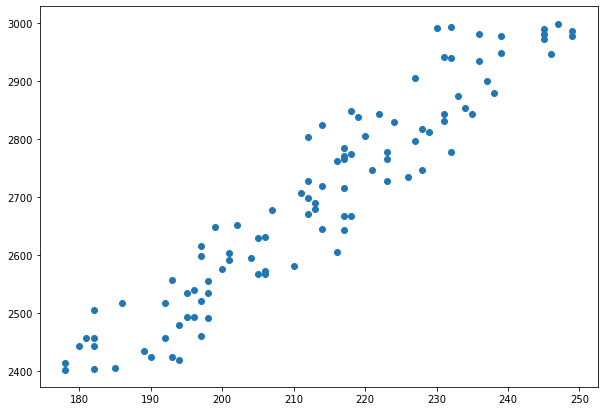

In [112]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(x=cl['food'],y=cl['weight'])
plt.show

In [113]:
#k-Means 군집 알고리즘 수행을 위한 함수 불러오기
from sklearn.cluster import KMeans

In [114]:
#연속형 데이터만 추출
cl_n=cl.iloc[:,1:3].values

In [115]:
#연속형 데이터만으로 군집 실행
cl_kmc=KMeans(n_clusters=3).fit(cl_n)

In [116]:
#군집 결과 확인
cl_kmc.labels_

array([2, 1, 2, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1, 2,
       1, 2, 1, 2, 0, 2, 1, 0, 1, 0, 0, 2, 1, 2, 0, 2, 1, 0, 2, 1, 0, 0,
       0, 0, 2, 2, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 2, 1, 1, 0,
       1, 1, 1, 0, 0, 2, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 1, 2, 2, 2, 0, 0, 0, 1])

In [117]:
#군집별 개수 확인
import numpy as np
np.unique(cl_kmc.labels_, return_counts=True)

(array([0, 1, 2]), array([38, 27, 35], dtype=int64))

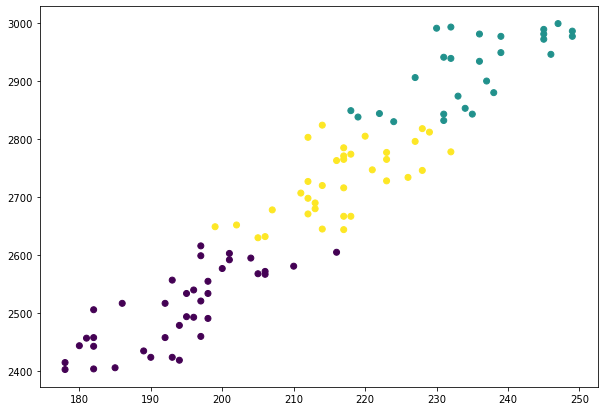

In [118]:
plt.figure(figsize=(10,7))
plt.scatter(x=cl['food'],y=cl['weight'],c=cl_kmc.labels_)
plt.show()